$$
\newcommand{\mymat}[1]{
\left[
\begin{array}{rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
#1
\end{array}
\right]
}
\newcommand{\myp}[1]{\left( #1 \right)}
\newcommand{\myb}[1]{\left[ #1 \right]}
\newcommand{\myv}[1]{\left< #1 \right>}
\newcommand{\mys}[1]{\left\{ #1 \right\}}
\newcommand{\myab}[1]{\left| #1 \right|}
\newcommand{\bx}{{\bf x}}
\newcommand{\by}{{\bf y}}
\newcommand{\bu}{{\bf u}}
\newcommand{\bv}{{\bf v}}
$$

#Chapter 2: Statistical Learning

Suppose that we observe a quantitative response $Y$ and $p$ predictors $X_1, X_2, \ldots, X_p$.  We assume that there exists some relation between $Y$ and $X = \left(X_1, X_2, \ldots, X_p\right)$ given by 

$$
Y = f\left( X \right) + \epsilon.
$$

Here $f$ is some fixed (but unknown) function and $\epsilon$ is a random error term that is independent of $X$ and has zero mean. The function $f$ represents the *systematic* information that $X$ provides about $Y$.  The $\epsilon$ term can come from several difference sources.  For instance, it might come from the fact that there are other factors that influence $Y$ that we're not including in our predictor set.  It can also come from the fact that our measurements are not perfect. 

Our goal is to approximate the function $f$ by some known function $\hat{f}$.  Then, given some observed predictors $X$, we can approximate the response by 

$$
\hat{Y} = \hat{f}\left( X \right) 
$$

The error in the prediction can be measured by the expected value of the square difference between $Y$ and $\hat{Y}$.  We have 

$$
\begin{array}{rcl}
E\left[ \left( Y - \hat{Y} \right)^2 \right] &=& E\left[ \left( f\left(X\right) + \epsilon - \hat{f}\left( X \right) \right)^2 \right] \\ 
&=& E\left[ \left( f\left(X\right) - \hat{f}\left( X \right) \right)^2 + \epsilon\left( f\left(X\right) - \hat{f}\left( X \right) \right) + \epsilon^2 \right] \\  
&=&  ~~~ \left[~ f\left(X\right) - \hat{f}\left( X \right) \right]^2 + Var\left(\epsilon \right) \\
\end{array}
$$

where the last step follows from the fact that $\epsilon$ has zero mean and is independent from $X$. These two terms partition the error into reducible and irreducible categories.  The first term is reducible because we can do a better job of approximating the unknown $f$ by $\hat{f}$.    

The particular model that we choose for $\hat{f}$ often depends on the main goal of the problem.  If we're simply using the model to make *inferences* about the relationships between the predictors and the response then a simple (i.e. linear) model might be appropriate.  If we're actually trying to derive accurate predictions then a more complicated model might be warranted. 

Suppose that we have $n$ observations of the data and the response for the $p$ predictors.  We can store the *training data* in an $n \times p$ matrix $X$ where each row corresponds to a particular observation and each column corresponds to a predictor.  Similarly, let the $n$-length vector $Y$ be the vector that stores the response data. 

Our goal is to find a function $\hat{f}$ such that $Y \approx \hat{f}\myp{X}$ for any observation $\myp{X, Y}$. There are two rough classes of models that can be used to determine $\hat{f}$: *parameteric* and *non-parametric* methods. 

###Parameteric Methods

Parametric methods make an assumption about the functional form of $f$.  The most common functional form is linear, i.e. 

$$
f\myp{X} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_p X_p
$$

Making this assumption about $f$ reduces the learning problem to one of estimating the $p+1$ coefficients $\beta_0, \ldots, \beta_p$.  Once the form of the model has been selected we use the training data to estimate the parameters.  That is, we want to choose the $\beta$'s such that 

$$
Y \approx \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_p X_p
$$

for each of the training observations.  For a linear model this is typically done using ordinary least squares (aka linear regression).  Least squares attempts to minimizes the sum of the squared errors for each observation in the training set.  Of course other methods for minimizing the approximation error exist (e.g. $L_1$-minimization). 

The advantage of the parametric approach is that it's pretty easy to estimate the parameters (with linear algebra!).  The disadvantage is that the real world is rarely linear and thus using such simple models often produce poor approximation performance. The fix for this is to use a more flexible model (e.g. by including polynomial combinations of the predictors) but this means having to estimate more parameters.  This often leads to *overfitting* of the training data, in which case the model does a good job of approximating the training data, but a poor job on additional test data. 

###Non-Parametric Methods

Non-parametric methods make no assumptions on the functional form of the model.  Instead they attempt to estimate $f$ in such a way that it represents the model well without too much overfitting.  The major disadvantage of non-parametric methods is that they do not reduce the learning problem to the estimation of a small number of parameters, and thus can be very expensive and can require a lot of data for good performance. 

###Regression vs Classification 

For some applications we're actually interested in making predictions that lie on the real line.  For instance we might want to predict the market value of a home based on its square-footage, its age, etc.  These are your typical regression problems.   

In other cases we're interested in making more qualitative predictions, such as whether or not a patient has cancer based on a collection of medical tests.

Of course there is some cross-over between these two categories.  For instance, logistic regression is a method that predicts what can be interpretted as a probability that a particular observation falls in a particular category.  The prediction then is quantitative, but you can use that quantitative value to make a qualitative prediction (e.g. is there greater than an 80% chance that the patient has cancer). 

###Assessing Model Accuracy 

In order to evaluate the accuracy of a method we need some way of quantifying the error.  In the regression setting the most common measure is the *mean squared error* (MSE), given by 

$$
\textrm{MSE} = \frac{1}{n} \sum_{i=1}^n \myp{y_i - \hat{f}\myp{x_i}}^2
$$

Note that this is just the average of the squared error for each observation. 

Typically a learning experiment occurs in two stages.  First you fit the model parameters to the training data, and then test the model on test data that is previously *unseen*.  Of course we expect the performance of the model to vary depending on whether we're using training data or test data.  As such, it's often natural to talk about the *training error* and the *test error*. Of course if you don't actually have test error then there are cross-validation methods you can use to approximate how your method would do in real life. 



In [517]:
numTest = 10
numTrain = 50
xTrain = np.linspace(0,1,numTrain) + np.random.rand(numTrain) / (2.0*numTrain)
xTest = np.linspace(0,1,numTest) + np.random.rand(numTest) / (2.0*numTest)
yTrain = map(lambda x: -15*(x-.6)**2+1*x+5, xTrain) + 1.75*np.random.rand(len(xTrain))
yTest  = map(lambda x: -15*(x-.6)**2+1*x+5, xTest) + 1.75*np.random.rand(len(xTest))

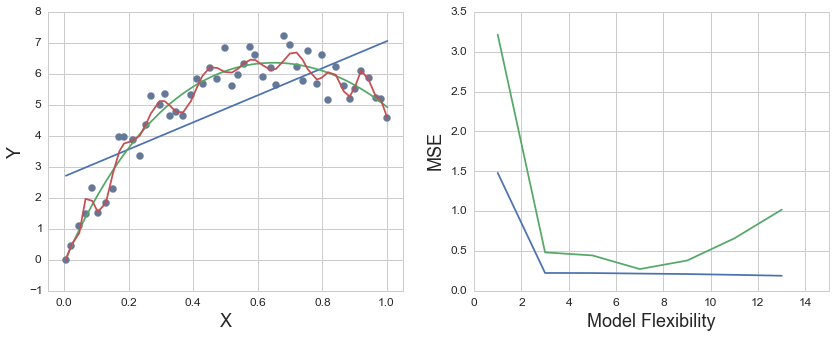

In [529]:
mycolors = {"green" : "#6a9373","red" : "#a76c6e","blue": "#657897"}
regr = linear_model.LinearRegression()
x = np.linspace(0,1,100)
f, (ax1, ax2) = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(14)
ax1.scatter(xTrain, yTrain, color=mycolors["blue"], s=50)
for degree in [1, 4, 25]:
    poly = PolynomialFeatures(degree=degree)
    ATrain = poly.fit_transform(xTrain.reshape(len(xTrain),1))
    beta, ssq = np.linalg.lstsq(ATrain, yTrain)[0:2]
    ax1.plot(xTrain.reshape(len(xTrain),1), np.dot(ATrain, beta))
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_xlim([-.05,1.05])

MSETest = []
MSETrain = []
mxDegree=15
for degree in range(1, mxDegree, 2):
    poly = PolynomialFeatures(degree=degree)
    ATrain = poly.fit_transform(xTrain.reshape(len(xTrain),1))
    ATest  = poly.fit_transform(xTest.reshape(len(xTest),1))
    beta, ssq = np.linalg.lstsq(ATrain, yTrain)[0:2]
    MSETrain.append(ssq[0] / len(yTrain))
    MSETest.append( (np.linalg.norm(yTest - np.dot(ATest,beta))**2 / len(yTest))  )

ax2.set_xlabel("Model Flexibility")
ax2.set_ylabel("MSE")
ax2.plot(range(1,mxDegree,2),np.array(MSETrain))
ax2.plot(range(1,mxDegree,2),np.array(MSETest))
ax2.set_xlim([0,mxDegree]);

Here we see the result of using different orders of polynomial regression on a set of training and test data.  Notice that for both the test and training sets, the MSE initially decreases with the order of the polynomial regression, but then quickly the test MSE begins to rise.  This happens because with higher model flexibility the algorithm *overfits* the training data and becomes a poor predictor for the test data. 

###The Bias-Variance Trade-Off

We can further expand the reducible and irreducible errors for the test set to include the bias and variance of the estimator itself.  Suppose that $x$ is a random variable representing some test data, and $y$ is the model response.  Then the test MSE is given as follows 

$$
\begin{array}
~E[y - \hat{f}\myp{x}]^2 &=& E[f\myp{x} - \hat{f}\myp{x}]^2 + V\myb{\epsilon} \\ 
&=& E[ (f(x)-E[\hat{f}(x)]) + (E[\hat{f}(x)] - \hat{f}(x) )]^2 + V[\epsilon] \\
&=& E[~ (f(x) - E[\hat{f}(x)])^2 + 2(f(x) - E[\hat{f}(x)])(E[\hat{f}(x)-\hat{f}(x)) ~] + (E[\hat{f}(x)]-\hat{f}(x))^2 ~] + V[\epsilon] \\
&=& [f(x) - E[\hat{f}(x)]^2 + E[~E[\hat{f}(x)] - \hat{f}(x)~]^2 + V[\epsilon] \\ 
&=& \textrm{Bias}^2 + \textrm{Variance}^2 + V[\epsilon] 
\end{array}
$$

This expression shows us that we have to find a happy medium between the bias of the estimator and the variance of the estimator.  So what causes bias and what causes variance?  

From the expression you can see that **large bias** occurs when even the best estimate from the model is not a good approximation of the true model $f$.  This might occur if we say use linear regression to model data that comes from a highly nonlinear ground truth.  

On the other hand, **large variance** occurs when the estimate from the model is very sensitive to the training data.  Think about the case when we overfit data in polynomial regression.  You get this super wiggly approximation that clearly could be very different given a different training set. 

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br>
<br><br><br><br><br><br>
<br><br><br><br><br><br>
<br><br><br><br><br><br>
<br><br><br><br><br><br>
<br><br><br><br><br><br>

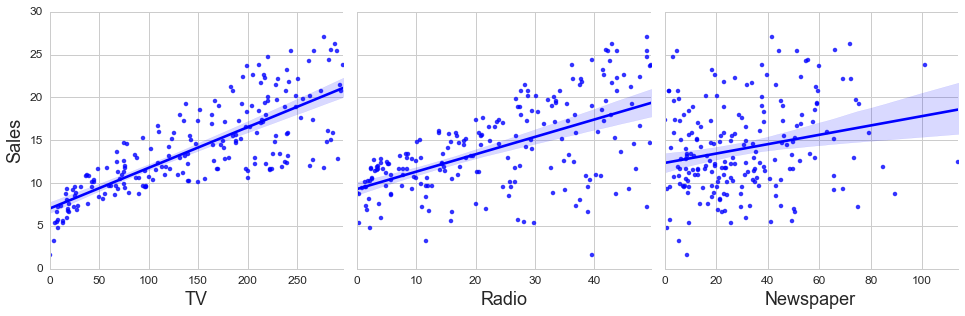

In [157]:
advertising = pd.read_csv("../data/Advertising.csv")
g = sns.PairGrid(advertising,x_vars=['TV','Radio', 'Newspaper'],y_vars=['Sales'], size=4.5, aspect=1.0)
g.map(sns.regplot, color="b", truncate=False)
g.axes[0,0].set(xlim=(0, advertising.TV.max()))
g.axes[0,1].set(xlim=(0, advertising.Radio.max()))
g.axes[0,2].set(xlim=(0, advertising.Newspaper.max()));
plt.tight_layout()

In [125]:
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt 
import seaborn as sns
rc={'font.size': 18, 'axes.labelsize': 18, 'legend.fontsize': 16.0, 
    'axes.titlesize': 12, 'xtick.labelsize': 12, 'ytick.labelsize': 12}
sns.set(style="whitegrid", rc=rc)

%matplotlib inline